# Question 2b

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


170508288/170498071 [==============================] - 6s 0us/step


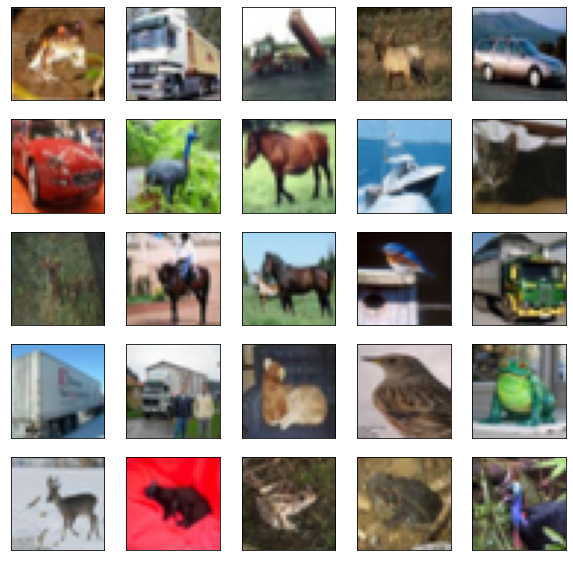

In [ ]:
# https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(class_names[np.argmax(train_labels[i][0])])
plt.show()

## Repeat question 2a by adding batch normalization layers with batch size 500: c3-16 -> bn -> c16-16 -> bn -> mp -> c16-32 -> bn -> c32-32 -> bn -> mp -> c32-64 -> bn -> c64-64 -> bn -> mp -> c64-128 -> bn -> c128-128 -> bn -> aap -> flatten -> fc128-10 -> cross entropy loss

In [ ]:
# c3-16 -> c16-16 -> mp -> c16-32 -> c32-32 -> mp -> c32-64 -> c64-64 -> mp -> c64-128 -> c128-128 -> aap -> flatten -> fc128-10 -> cross entropy loss
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(strides=(4, 4), padding = "same"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                        

In [ ]:
# the sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets
# the categorical_crossentropy is defined as categorical cross-entropy between an output tensor and a target tensor
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
model = load_model('/content/drive/MyDrive/BS6207/best_model.h5')
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('/content/drive/MyDrive/BS6207/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# saved_model = load_model('best_model.h5')
# fit model
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels), callbacks=[mc])

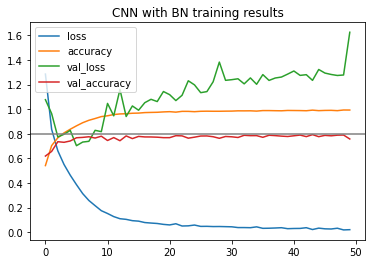

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.title("CNN with BN training results")
plt.axhline(y=0.8, color='grey', linestyle='-')

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9963
Epoch 00001: val_accuracy improved from -inf to 0.79680, saving model to /content/drive/MyDrive/BS6207/best_model.h5
782/782 [==============================] - 261s 332ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 1.2146 - val_accuracy: 0.7968
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9957
Epoch 00002: val_accuracy did not improve from 0.79680
782/782 [==============================] - 252s 322ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 1.2136 - val_accuracy: 0.7965
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9958
Epoch 00003: val_accuracy did not improve from 0.79680
782/782 [==============================] - 252s 322ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 1.2121 - val_accuracy: 0.7964
Epoch 4/50
782/782 [==============================] - ETA: 0s - loss: 0.0132 - a

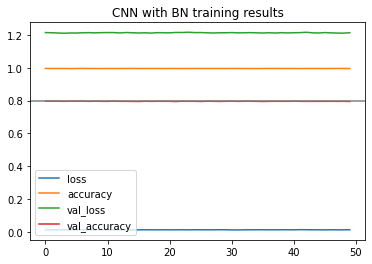

In [ ]:
# the sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets
# the categorical_crossentropy is defined as categorical cross-entropy between an output tensor and a target tensor
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
model = load_model('/content/drive/MyDrive/BS6207/best_model.h5')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-10),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('/content/drive/MyDrive/BS6207/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# saved_model = load_model('best_model.h5')
# fit model
history2 = model.fit(train_images, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels), callbacks=[mc])

pd.DataFrame(history2.history).plot()
plt.title("CNN with BN training results")
plt.axhline(y=0.8, color='grey', linestyle='-')

Epoch 1/50
391/391 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9969
Epoch 00001: val_accuracy improved from -inf to 0.79700, saving model to /content/drive/MyDrive/BS6207/best_model.h5
391/391 [==============================] - 215s 547ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 1.2108 - val_accuracy: 0.7970
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9967
Epoch 00002: val_accuracy did not improve from 0.79700
391/391 [==============================] - 214s 548ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 1.2113 - val_accuracy: 0.7967
Epoch 3/50
391/391 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9968
Epoch 00003: val_accuracy did not improve from 0.79700
391/391 [==============================] - 218s 557ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 1.2103 - val_accuracy: 0.7963
Epoch 4/50
391/391 [==============================] - ETA: 0s - loss: 0.0108 - a

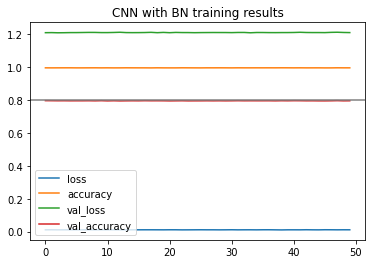

In [ ]:
# the sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets
# the categorical_crossentropy is defined as categorical cross-entropy between an output tensor and a target tensor
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
model = load_model('/content/drive/MyDrive/BS6207/best_model.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-15),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('/content/drive/MyDrive/BS6207/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# saved_model = load_model('best_model.h5')
# fit model
history3 = model.fit(train_images, train_labels, epochs=50, batch_size=128, 
                    validation_data=(test_images, test_labels), callbacks=[mc])

pd.DataFrame(history3.history).plot()
plt.title("CNN with BN training results")
plt.axhline(y=0.8, color='grey', linestyle='-')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True, 
        )

# change learning rate and optimizer
model = load_model('/content/drive/MyDrive/BS6207/best_model.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mc = ModelCheckpoint('/content/drive/MyDrive/BS6207/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(data_aug.flow(train_images, train_labels, batch_size=500), epochs=20, 
                    validation_data=(test_images, test_labels), callbacks=[mc])

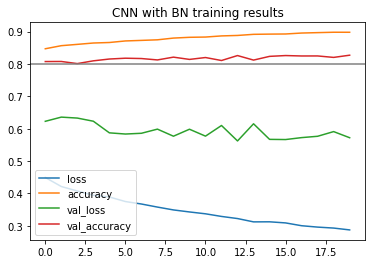

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.title("CNN with BN training results")
plt.axhline(y=0.8, color='grey', linestyle='-')

## Print out picture of average absolute values of activations for each layer, show in your assignment report

## Explain your observations and make conclusions. What is the different between observations of Q2a and Q2b and why?